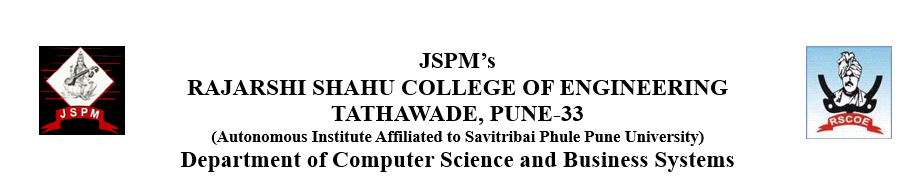

### Name: Gitanjali Govardhan Shinde

### PRN No.: RBT21CB068


# Problem statement

In the realm of machine learning, choosing the most suitable classification algorithm for a given dataset is crucial for achieving accurate and reliable predictions. This practical aims to conduct a comparative study between two popular classification algorithms—K-Nearest Neighbors (KNN) and Decision Tree—using a drug dataset. The objective is to assess the performance of these algorithms in predicting patient responses to different medications, providing insights into their strengths, weaknesses, and suitability for this specific healthcare scenario.

# Introduction:
## Theory:
Personalized medicine is revolutionizing healthcare by tailoring treatment plans based on individual patient characteristics. The utilization of machine learning algorithms is pivotal in this context for predicting optimal drug choices. In this practical, we focus on comparing the performance of K-Nearest Neighbors (KNN) and Decision Tree algorithms using a drug dataset. KNN relies on the similarity of data points, while Decision Tree creates a tree-like model of decisions based on feature splits. Understanding how these algorithms perform on drug response prediction is vital for healthcare practitioners to make informed decisions regarding patient treatments.




##### Import necessary libraries

In [ ]:
import numpy as np # linear algebra


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt


import seaborn as sns


import plotly.graph_objects as go


import plotly.express as px

## Data preprocessing

In [ ]:

# I read the dataset with the pandas library.

data = pd.read_csv("drug200.csv")



In [ ]:

data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:

data.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:

data.corr()


<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<ipython-input-7-6e09e9956549>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)


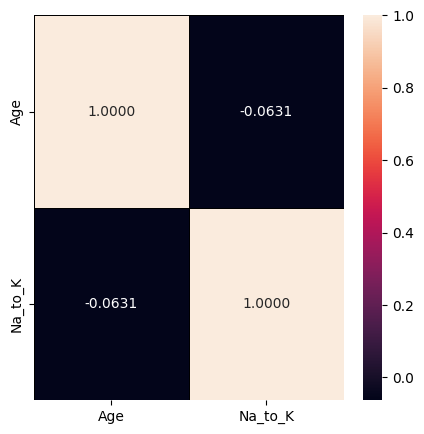

In [ ]:

f, ax = plt.subplots(figsize = (5,5))


sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)


plt.show()

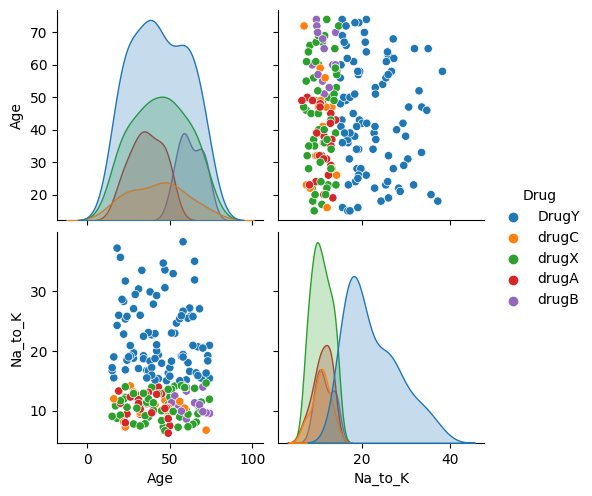

In [ ]:

sns.pairplot(data, hue = "Drug")


In [ ]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
data["Age"].value_counts(dropna=False)

In [ ]:
data["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
data["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
data["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
data["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## Data Visualization

In [ ]:

dataAge = data["Age"].value_counts(dropna = False)
npar_dataAge = np.array(dataAge)
x = list(npar_dataAge)
y = data.Age.value_counts().index
DataAge = {"Age": y, "Number": x}
DataAge = pd.DataFrame(DataAge)
fig = px.bar(DataAge, x = "Age", y = "Number")
fig.show()

In [ ]:
fig = px.bar(x = ["HIGH", "LOW", "NORMAL"], y = [77, 64, 59])

fig.show()

In [ ]:
fig = px.histogram(x = ["HIGH", "NORMAL"], y = [103, 97])
fig.show()

In [ ]:
fig = go.Figure(data = [go.Pie(labels=["DrugY","DrugX","DrugA","DrugC","DrugB"], values=[91,54,23,16,16])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = px.colors.sequential.RdBu, line = dict( color = '#000000', width = 2)))

fig.show()

In [ ]:
fig = px.scatter(data, x = "Na_to_K", y="Age", color="Drug",
                 size='Age', hover_data=['Na_to_K'])
fig.show()

In [ ]:
dataclass = pd.read_csv("drug200.csv")

In [ ]:
dataclass.Sex = [1 if i == "F" else 0 for i in dataclass.Sex]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(dataclass.BP)):
    if dataclass.BP[i] == "LOW":
        dataclass.BP[i] = 2

    elif dataclass.BP[i] == "NORMAL":
        dataclass.BP[i] = 1

    else:
        dataclass.BP[i] = 0


In [ ]:
dataclass.Cholesterol = [1 if i == "HIGH" else 0 for i in dataclass.Cholesterol]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(dataclass)):
    if dataclass.Drug[i] == "DrugY":
        dataclass.Drug[i] = 4
    elif dataclass.Drug[i] == "drugX":
        dataclass.Drug[i] = 3
    elif dataclass.Drug[i] == "drugA":
        dataclass.Drug[i] = 2
    elif dataclass.Drug[i] == "drugC":
        dataclass.Drug[i] = 1
    else:
        dataclass.Drug[i] = 0

In [ ]:
data_types_dict = {'BP': int, "Drug": int}

dataclass = dataclass.astype(data_types_dict)

dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
x_data = dataclass.drop(["Drug"], axis = 1)
y_data = dataclass.Drug.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

# 1.K-Nearest Neighbors (KNN):
KNN is a non-parametric and lazy learning algorithm used for classification and regression. It makes predictions based on the majority class of the k-nearest data points in the feature space. In the drug dataset, KNN may identify patterns in patient attributes to predict the most appropriate drug for an individual.

In [ ]:
df = pd.read_csv("drug200.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
pd.get_dummies(df)


,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,1,0,1,0,0,1,0,1,0,0,0,0
1,47,13.093,0,1,0,1,0,1,0,0,0,0,1,0
2,47,10.114,0,1,0,1,0,1,0,0,0,0,1,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,0,1
4,61,18.043,1,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,0,0,1,0
196,16,12.006,0,1,0,1,0,1,0,0,0,0,1,0
197,52,9.894,0,1,0,0,1,1,0,0,0,0,0,1
198,23,14.020,0,1,0,0,1,0,1,0,0,0,0,1


In [ ]:
X = pd.get_dummies(df.drop('Drug',axis=1),drop_first=True)
y = df['Drug']

In [ ]:
X.head()
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(scaled_X_train,y_train)


KNeighborsClassifier(n_neighbors=14)

In [ ]:
full_test = pd.concat([X_test,y_test],axis=1)
len(full_test)

60

In [ ]:
y_pred = knn_model.predict(scaled_X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.7666666666666667

In [ ]:
confusion_matrix(y_test,y_pred)

array([[22,  0,  0,  0,  4],
       [ 0,  6,  0,  0,  0],
       [ 0,  1,  5,  0,  0],
       [ 6,  0,  0,  2,  1],
       [ 2,  0,  0,  0, 11]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.73      0.85      0.79        26
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.83      0.91         6
       drugC       1.00      0.22      0.36         9
       drugX       0.69      0.85      0.76        13

    accuracy                           0.77        60
   macro avg       0.86      0.75      0.75        60
weighted avg       0.80      0.77      0.74        60



# 2.Decision Tree:
Decision Tree is a versatile supervised learning algorithm that partitions the dataset into subsets based on the most discriminative features. It creates a tree structure where each internal node represents a decision based on a feature, and each leaf node represents a class label. In the drug dataset, Decision Tree can discern relationships between patient characteristics and drug responses, aiding in personalized medicine decisions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier()

# Fit the model
dtc.fit(x_train, y_train)

# Predict the x_test
predict = dtc.predict(x_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(predict,y_test))

The accuracy of the Decision Tree is 0.9666666666666667


#### Decision tree with ginni impurity

In [ ]:
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# Fit the model
DTC_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = DTC_gini.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9000


In [ ]:
y_pred_train_gini = DTC_gini.predict(x_train)

y_pred_train_gini

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9143


In [ ]:
# Print the scores on training and test set

print('Training set score: {:.4f}'.format(DTC_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_gini.score(x_test, y_test)))

Training set score: 0.9143
Test set score: 0.9000


#### Decision tree with entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
DTC_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# Fit the model
DTC_en.fit(x_train, y_train)
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
y_pred_en = DTC_en.predict(x_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = DTC_en.predict(x_train)

y_pred_train_en

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

print('Training set score: {:.4f}'.format(DTC_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_en.score(x_test, y_test)))


Model accuracy score with criterion entropy: 0.9000
Training-set accuracy score: 0.9143
Training set score: 0.9143
Test set score: 0.9000


# Conclusion

In the comparative study of K-Nearest Neighbors (KNN) and Decision Tree algorithms on the drug dataset, the Decision Tree exhibited significantly higher accuracy (0.9143) compared to KNN (0.767). This suggests that, for this particular dataset, the Decision Tree is more effective in predicting patient responses to medications. While the Decision Tree excels in accuracy, its complexity may impact interpretability. Practitioners should consider the trade-offs between accuracy and interpretability when choosing an algorithm for drug response prediction in personalized medicine.